In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load datasets
canada_income_file = "canada_per_capita_income.csv"
salary_file = "salary.csv"

canada_income_df = pd.read_csv(canada_income_file)
salary_df = pd.read_csv(salary_file)

In [ ]:
X_canada = canada_income_df[['year']]
y_canada = canada_income_df['per capita income']

model_canada = LinearRegression()
model_canada.fit(X_canada, y_canada)

# Predict per capita income for 2020
income_2020 = model_canada.predict([[2020]])[0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
salary_df['YearsExperience'].fillna(salary_df['YearsExperience'].mean(), inplace=True)

X_salary = salary_df[['YearsExperience']]
y_salary = salary_df['Salary']

model_salary = LinearRegression()
model_salary.fit(X_salary, y_salary)

# Predict salary for 12 years of experience
salary_12_years = model_salary.predict([[12]])[0]

<ipython-input-25-709addff6643>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  salary_df['YearsExperience'].fillna(salary_df['YearsExperience'].mean(), inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Per Capita Income for Canada in 2020: $41288.69


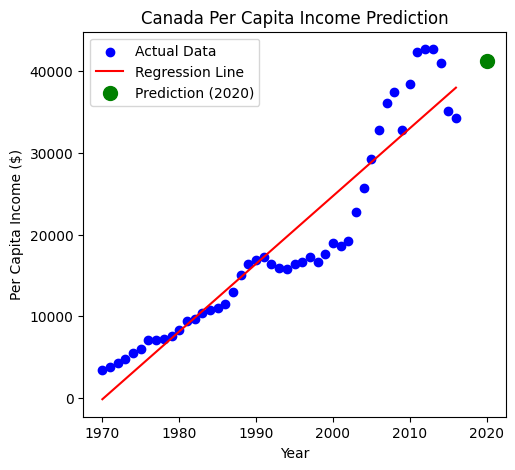

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_canada, y_canada, color='blue', label="Actual Data")
plt.plot(X_canada, model_canada.predict(X_canada), color='red', label="Regression Line")
plt.scatter([[2020]], [income_2020], color='green', marker='o', s=100, label="Prediction (2020)")
plt.xlabel("Year")
plt.ylabel("Per Capita Income ($)")
plt.title("Canada Per Capita Income Prediction")
plt.legend()
print(f"Predicted Per Capita Income for Canada in 2020: ${income_2020:.2f}")

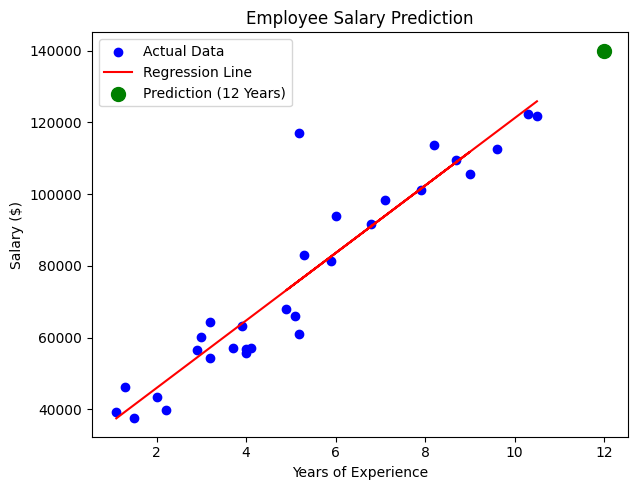

Predicted Salary for 12 Years of Experience: $139980.89


In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.scatter(X_salary, y_salary, color='blue', label="Actual Data")
plt.plot(X_salary, model_salary.predict(X_salary), color='red', label="Regression Line")
plt.scatter([[12]], [salary_12_years], color='green', marker='o', s=100, label="Prediction (12 Years)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary ($)")
plt.title("Employee Salary Prediction")
plt.legend()

# Show plots
plt.tight_layout()
plt.show()
print(f"Predicted Salary for 12 Years of Experience: ${salary_12_years:.2f}")

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# ------------------- HR Salary Prediction -------------------

# Load Hiring dataset
hiring_df = pd.read_csv("hiring.csv")

# Convert experience column to numerical values
word_to_num = {
    "zero": 0, "one": 1, "two": 2, "three": 3, "four": 4,
    "five": 5, "six": 6, "seven": 7, "eight": 8, "nine": 9, "ten": 10, "eleven": 11
}

hiring_df['experience'] = hiring_df['experience'].replace(word_to_num)
hiring_df['experience'] = hiring_df['experience'].fillna(0).astype(int)  # Fill NaN with 0

# Fill missing values in test_score and interview_score with column means
hiring_df['test_score(out of 10)'].fillna(hiring_df['test_score(out of 10)'].mean(), inplace=True)
hiring_df['interview_score(out of 10)'].fillna(hiring_df['interview_score(out of 10)'].mean(), inplace=True)

<ipython-input-35-98e3baffc574>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hiring_df['experience'] = hiring_df['experience'].replace(word_to_num)
<ipython-input-35-98e3baffc574>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hiring_df['test_score(out of 10)'].fillna(hiring_df['test_score(o

In [36]:
X_hiring = hiring_df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y_hiring = hiring_df['salary($)']

# Train the model
model_hiring = LinearRegression()
model_hiring.fit(X_hiring, y_hiring)

# Predict salaries for given candidates
candidate_1 = np.array([[2, 9, 6]])
candidate_2 = np.array([[12, 10, 10]])

salary_pred_1 = model_hiring.predict(candidate_1)[0]
salary_pred_2 = model_hiring.predict(candidate_2)[0]

print(f"Predicted Salary for (2 yrs exp, 9 test score, 6 interview score): ${salary_pred_1:.2f}")
print(f"Predicted Salary for (12 yrs exp, 10 test score, 10 interview score): ${salary_pred_2:.2f}")

Predicted Salary for (2 yrs exp, 9 test score, 6 interview score): $53290.89
Predicted Salary for (12 yrs exp, 10 test score, 10 interview score): $92268.07


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


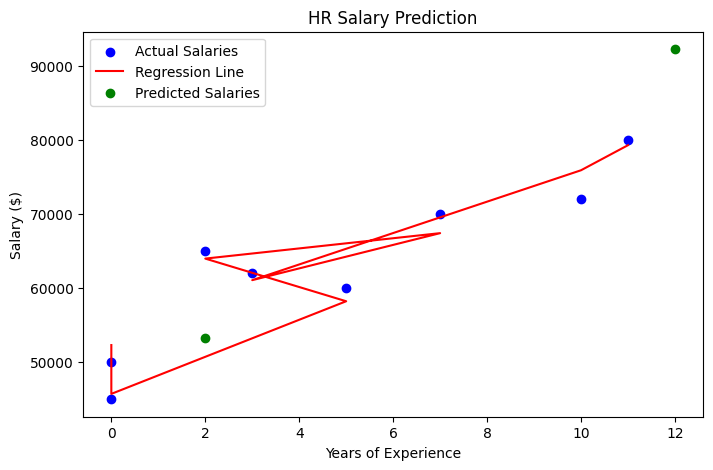

In [39]:
plt.figure(figsize=(8, 5))
plt.scatter(hiring_df['experience'], y_hiring, color='blue', label="Actual Salaries")
plt.plot(hiring_df['experience'], model_hiring.predict(X_hiring), color='red', label="Regression Line")
plt.scatter([2, 12], [salary_pred_1, salary_pred_2], color='green', marker='o', label="Predicted Salaries")
plt.xlabel("Years of Experience")
plt.ylabel("Salary ($)")
plt.title("HR Salary Prediction")
plt.legend()
plt.show()

# ------------------- Company Profit Prediction -------------------

# Load Companies dataset
companies_df = pd.read_csv("1000_Companies.csv")

# Define features and target variable
X_companies = companies_df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y_companies = companies_df['Profit']

# Encode the categorical 'State' column
column_transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['State'])], remainder='passthrough')

# Transform the dataset
X_companies_encoded = column_transformer.fit_transform(X_companies)

# Train the Multiple Linear Regression model
model_companies = LinearRegression()
model_companies.fit(X_companies_encoded, y_companies)

# Predict profit for given inputs
input_data_df = pd.DataFrame([['Florida', 91694.48, 515841.3, 11931.24]],
                             columns=['State', 'R&D Spend', 'Administration', 'Marketing Spend'])

# Encode the input data
input_encoded = column_transformer.transform(input_data_df)

# Make the prediction
profit_prediction = model_companies.predict(input_encoded)[0]



Predicted Profit for given inputs: $510570.99


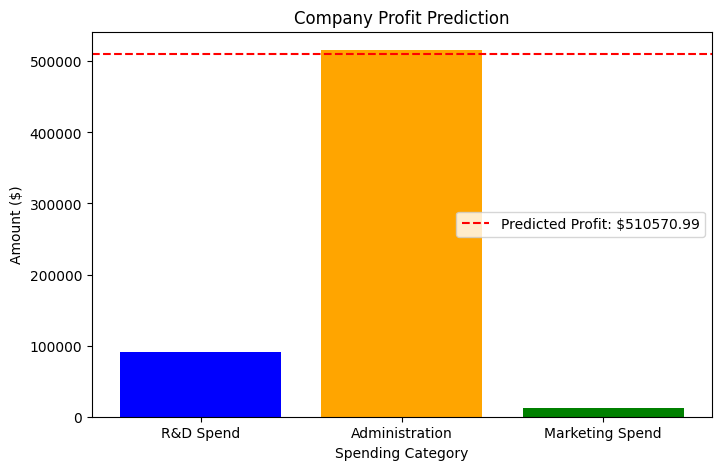

In [38]:
profit_prediction = model_companies.predict(input_encoded)[0]

print(f"Predicted Profit for given inputs: ${profit_prediction:.2f}")

# ---- Plot Profit Prediction ----
categories = ['R&D Spend', 'Administration', 'Marketing Spend']
values = [91694.48, 515841.3, 11931.24]

plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['blue', 'orange', 'green'])
plt.axhline(y=profit_prediction, color='red', linestyle='--', label=f"Predicted Profit: ${profit_prediction:.2f}")
plt.xlabel("Spending Category")
plt.ylabel("Amount ($)")
plt.title("Company Profit Prediction")
plt.legend()
plt.show()